In [56]:
from newspaper import Article
article = Article('https://en.wikipedia.org/wiki/Theoretical_physics')
article.download()
article.parse()

In [57]:
article.text

'Branch of physics\n\nTheoretical physics is a branch of physics that employs mathematical models and abstractions of physical objects and systems to rationalize, explain and predict natural phenomena. This is in contrast to experimental physics, which uses experimental tools to probe these phenomena.\n\nThe advancement of science generally depends on the interplay between experimental studies and theory. In some cases, theoretical physics adheres to standards of mathematical rigour while giving little weight to experiments and observations.[a] For example, while developing special relativity, Albert Einstein was concerned with the Lorentz transformation which left Maxwell\'s equations invariant, but was apparently uninterested in the Michelson–Morley experiment on Earth\'s drift through a luminiferous aether.[1] Conversely, Einstein was awarded the Nobel Prize for explaining the photoelectric effect, previously an experimental result lacking a theoretical formulation.[2]\n\nOverview\n

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

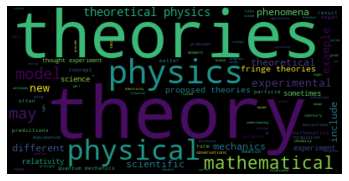

In [59]:
wc = WordCloud()
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
from wordcloud import STOPWORDS

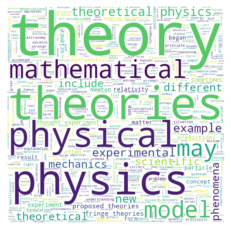

In [61]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

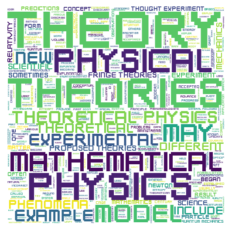

In [62]:
font_path = 'C:/Users/ASUS/AppData/Local/Microsoft/Windows/Fonts/Techno.ttf'
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, 
               background_color="white", max_words=2000,
               max_font_size=256, random_state=42,
               width=500, height=500)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
from PIL import Image
import numpy as np

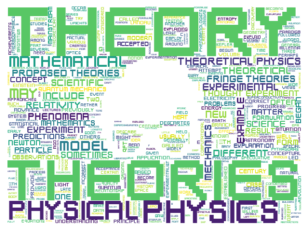

<Figure size 14400x7200 with 0 Axes>

In [64]:
mask = np.array(Image.open('sir.jpg'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=3000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.figure( figsize=(200,100) )
plt.show()



In [66]:
from PIL import Image, ImageDraw, ImageFont

import math

chars = "01"[::-1]
# chars = "#Wo- "[::-1]
charArray = list(chars)
charLength = len(charArray)
interval = charLength/256

scaleFactor = 1.2

oneCharWidth = 10
oneCharHeight = 18

def getChar(inputInt):
    return charArray[math.floor(inputInt*interval)]

text_file = open("Output.txt", "w")

im = Image.open("sir_a.jpg")

fnt = ImageFont.truetype('C:\\Windows\\Fonts\\lucon.ttf', 15)

width, height = im.size
im = im.resize((int(scaleFactor*width), int(scaleFactor*height*(oneCharWidth/oneCharHeight))), Image.NEAREST)
width, height = im.size
pix = im.load()

outputImage = Image.new('RGB', (oneCharWidth * width, oneCharHeight * height), color = (0, 0, 0))
d = ImageDraw.Draw(outputImage)

for i in range(height):
    for j in range(width):
        r, g, b = pix[j, i]
        h = int(r/3 + g/3 + b/3)
        pix[j, i] = (h, h, h)
        text_file.write(getChar(h))
        d.text((j*oneCharWidth, i*oneCharHeight), getChar(h), font = fnt, fill = (r, g, b))

    text_file.write('\n')

outputImage.save('output.png')

